In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from math import log
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline

In [ ]:
stunting_jabar = pd.read_csv("/content/Stunting vs Rata-rata Konsumsi Perkapita Seminggu Telur  Susu & Daging 2018-2022.csv")

In [ ]:
stunting_jabar.head(10)

,telur,susu,daging,stunting
0,2.538,0.279,0.168,1.08
1,2.563,0.212,0.169,5.32
2,2.373,0.243,0.150,6.57
3,2.827,0.344,0.205,7.91
4,2.273,0.225,0.154,12.07
5,1.980,0.240,0.124,15.71
6,2.270,0.213,0.153,6.47
7,2.080,0.184,0.128,8.19
8,2.085,0.261,0.098,10.29
9,2.575,0.300,0.133,2.22


In [ ]:
stunting_jabar.shape

(135, 4)

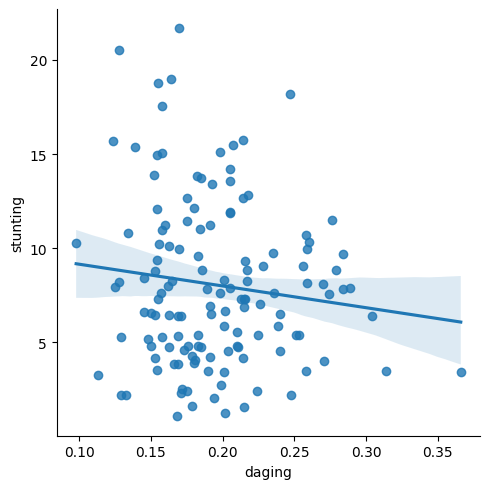

In [ ]:
sns.lmplot(x='daging', y="stunting", data=stunting_jabar)

In [1]:
plt.figure(figsize=(10,5))
c = stunting_jabar.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

NameError: ignored

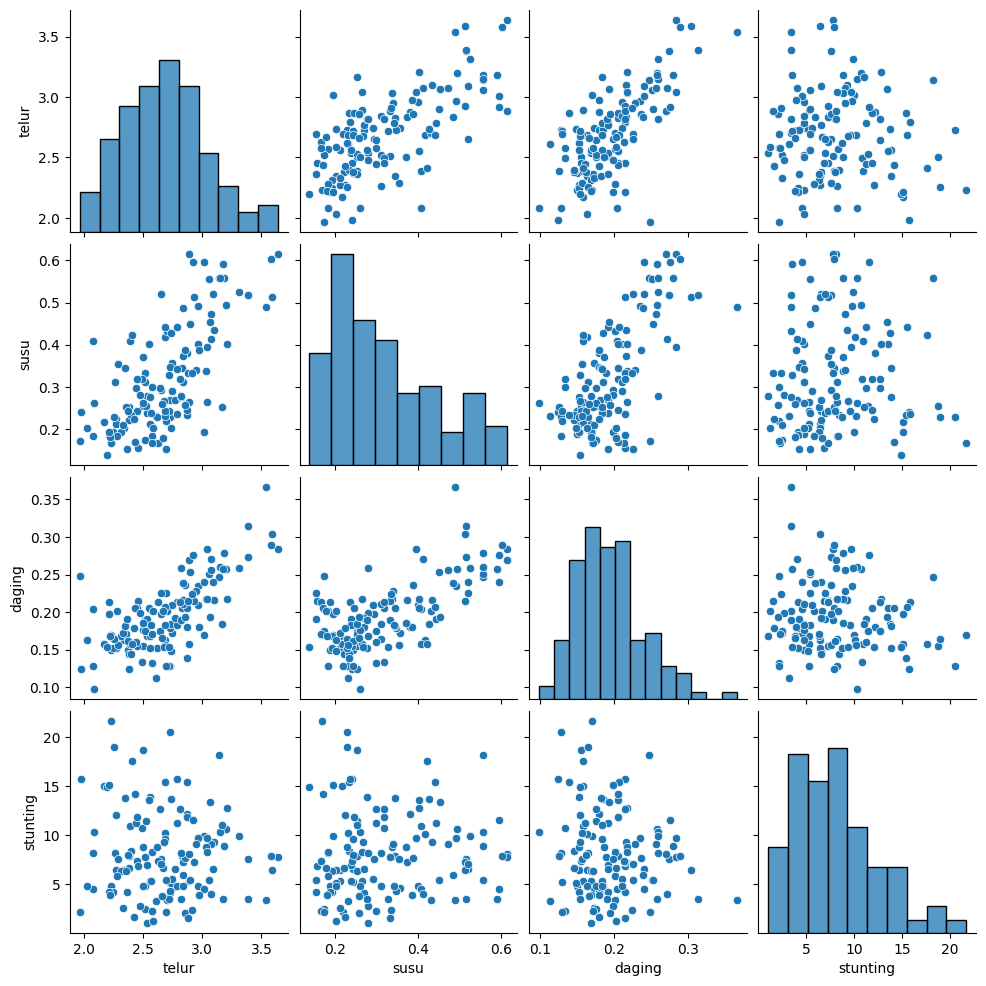

In [ ]:
sns.pairplot(stunting_jabar)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=stunting_jabar[['telur', 'susu', 'daging']]

In [ ]:
y=stunting_jabar.drop(['stunting'],axis=1).values

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
X_train

array([[ 1.03167237, -0.45890667,  0.48771632],
       [-1.21972609, -0.73271164, -0.68368692],
       [ 1.00576113,  0.1289687 ,  0.48771632],
       [-0.47693734, -0.07235848, -0.21954602],
       [-0.68998528, -0.1851017 , -0.77209471],
       [ 0.18235965,  0.29003045, -0.48476939],
       [ 0.02113418,  0.96648978,  0.26669684],
       [ 1.04318847,  0.59604776,  1.96854682],
       [ 0.41556077,  0.18534031,  0.22249294],
       [ 1.81188846,  1.64294911,  1.41599812],
       [ 0.77543904,  0.15312796,  0.73083774],
       [-1.1880568 , -0.86961412, -0.92680835],
       [ 2.75045099,  2.36772697,  1.96854682],
       [-0.52588079,  0.41082676, -0.19744407],
       [ 0.03840834, -1.35279936,  0.6645319 ],
       [ 0.70634241,  1.54631206,  0.44351242],
       [ 0.57102818,  0.09675635,  0.44351242],
       [ 0.68043118,  2.22277139,  1.79173124],
       [ 0.15356939, -0.95819808, -1.03731808],
       [ 0.84453567,  0.53162307, -0.33005575],
       [ 0.45874616, -0.07235848,  0.355

In [ ]:
X_test

array([[-0.26964746, -0.95014499,  0.1561871 ],
       [-0.66695307, -0.63607459, -0.88260445],
       [-1.7379508 ,  0.7007379 ,  0.20039099],
       [ 0.65739897,  0.10480944,  0.64242995],
       [-0.91742834, -1.34474627, -0.08693433],
       [-1.72067664, -0.48306593, -2.14241548],
       [-0.84833172,  0.7007379 , -0.81629861],
       [ 1.42897798,  2.17445287,  1.39389618],
       [ 1.32821206,  1.90870099,  1.15077475],
       [-0.71301749, -1.21589687,  0.22249294],
       [ 0.30039972,  0.98259595, -0.08693433],
       [-0.66119502, -0.02403996,  0.22249294],
       [ 0.81286638,  1.36914414,  0.88555138],
       [ 1.34260719,  1.90870099,  1.43810007],
       [-0.0767527 , -0.22536714,  0.06777931],
       [ 0.10174692,  0.05649092, -0.9047064 ],
       [-0.45390513, -0.53943754, -0.44056549],
       [-1.00667816, -0.8857203 , -0.50687134],
       [ 2.03069445,  1.57852441,  2.63160525],
       [ 0.29464167,  0.16923414, -0.26374991],
       [-1.73507178, -1.10315365, -1.479

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([[ 3.47339671e-01, -1.51580590e-17,  2.51046576e-17],
       [-8.94823276e-17,  1.24175979e-01,  5.55111512e-17],
       [-1.27163687e-17,  2.08166817e-17,  4.52448810e-02]])

In [ ]:
prediction = lm.predict(X_test)
prediction

array([[2.589, 0.203, 0.202],
       [2.451, 0.242, 0.155],
       [2.079, 0.408, 0.204],
       [2.911, 0.334, 0.224],
       [2.364, 0.154, 0.191],
       [2.085, 0.261, 0.098],
       [2.388, 0.408, 0.158],
       [3.179, 0.591, 0.258],
       [3.144, 0.558, 0.247],
       [2.435, 0.17 , 0.205],
       [2.787, 0.443, 0.191],
       [2.453, 0.318, 0.205],
       [2.965, 0.491, 0.235],
       [3.149, 0.558, 0.26 ],
       [2.656, 0.293, 0.198],
       [2.718, 0.328, 0.154],
       [2.525, 0.254, 0.175],
       [2.333, 0.211, 0.172],
       [3.388, 0.517, 0.314],
       [2.785, 0.342, 0.183],
       [2.08 , 0.184, 0.128],
       [2.263, 0.312, 0.165],
       [2.58 , 0.167, 0.171],
       [3.015, 0.194, 0.17 ],
       [2.564, 0.277, 0.152],
       [2.837, 0.486, 0.239],
       [2.534, 0.239, 0.191],
       [2.373, 0.243, 0.15 ],
       [3.075, 0.473, 0.256],
       [2.889, 0.265, 0.158],
       [2.031, 0.203, 0.163],
       [3.012, 0.597, 0.24 ],
       [2.835, 0.373, 0.216],
       [2.

Text(0, 0.5, 'Predicted  Values')

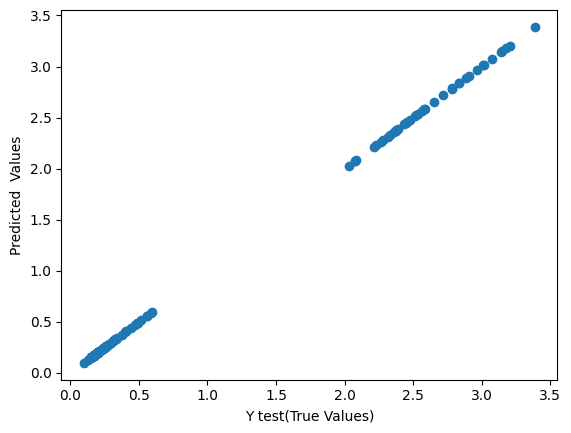

In [ ]:
plt.scatter(y_test,prediction)
plt.xlabel('Y test(True Values)')
plt.ylabel("Predicted  Values")

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1.7115938296304497e-16
MSE 6.806988005881813e-32
RMSE 2.609020506987596e-16


In [ ]:
from sklearn import metrics

In [ ]:
metrics.explained_variance_score(y_test,prediction)

1.0

In [ ]:
new_df = pd.DataFrame({"Actual":y_test,"Predicted":prediction})
new_df

ValueError: ignored

In [ ]:
ttest_result = stats.ttest_ind(stunting_jabar['telur'], stunting_jabar['daging'])
ttest_result

TtestResult(statistic=82.21421298780365, pvalue=3.956139724907715e-192, df=268.0)

In [ ]:
ttest_result = stats.ttest_ind(stunting_jabar['susu'], stunting_jabar['daging'])
ttest_result

TtestResult(statistic=11.04066646181505, pvalue=1.3163089609927668e-23, df=268.0)

In [ ]:
ttest_result = stats.ttest_ind(stunting_jabar['daging'], stunting_jabar['daging'])
ttest_result

TtestResult(statistic=0.0, pvalue=1.0, df=268.0)

In [ ]:
X = stunting_jabar.drop(["stunting"],axis=1)
X.head()

,telur,susu,daging
0,2.538,0.279,0.168
1,2.563,0.212,0.169
2,2.373,0.243,0.150
3,2.827,0.344,0.205
4,2.273,0.225,0.154


In [ ]:
X = stunting_jabar.drop(["stunting"],axis=1)
X.head()

,telur,susu,daging
0,2.538,0.279,0.168
1,2.563,0.212,0.169
2,2.373,0.243,0.150
3,2.827,0.344,0.205
4,2.273,0.225,0.154


In [ ]:
y = stunting_jabar['stunting']
y.head()

0     1.08
1     5.32
2     6.57
3     7.91
4    12.07
Name: stunting, dtype: float64

In [ ]:
X = sm.add_constant(X)
X.head()

,const,telur,susu,daging
0,1.0,2.538,0.279,0.168
1,1.0,2.563,0.212,0.169
2,1.0,2.373,0.243,0.150
3,1.0,2.827,0.344,0.205
4,1.0,2.273,0.225,0.154


In [ ]:
OLS =  sm.OLS(endog = y, exog = X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               stunting   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.124
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.100
Time:                        07:05:01   Log-Likelihood:                -387.01
No. Observations:                 135   AIC:                             782.0
Df Residuals:                     131   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1962      3.243      3.760      0.000       5.780      18.613
telur         -0.9547      1.674     -0.570      0.570      -4.267       2.358
susu           9.2048      4.455      2.066      0.041       0.391      18.018
daging       -23.2410     12.354     -1.881      0.062     -47.681       1.199
==============================================================================
Omnibus:                       12.912   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.788
Skew:                           0.764   Prob(JB):                      0.00101
Kurtosis:                       3.339   Cond. No.                         97.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""